<a href="https://colab.research.google.com/github/Krit-Barnwal/Summer-Ai-Ml/blob/main/Day11_AIML_Kritlreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets, linear_model,model_selection,metrics
data = datasets.load_diabetes()
print(data.data)
print(data.feature_names)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
import pandas as pd
import numpy as np
diabetes = data.data
print(type(diabetes))
feature_names = data.feature_names
# convert the data into dataFrame
dfDia = pd.DataFrame(diabetes,columns=feature_names)
dfDia.head()

<class 'numpy.ndarray'>


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
cor = dfDia.corr()
cor

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


<Axes: >

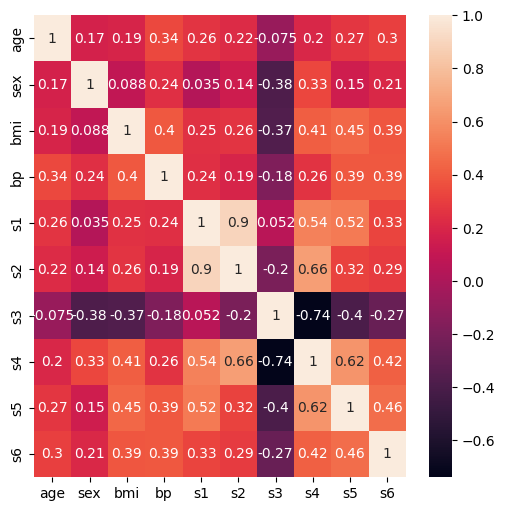

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1,(6,6))
sns.heatmap(cor,annot=True)


<Figure size 640x480 with 0 Axes>

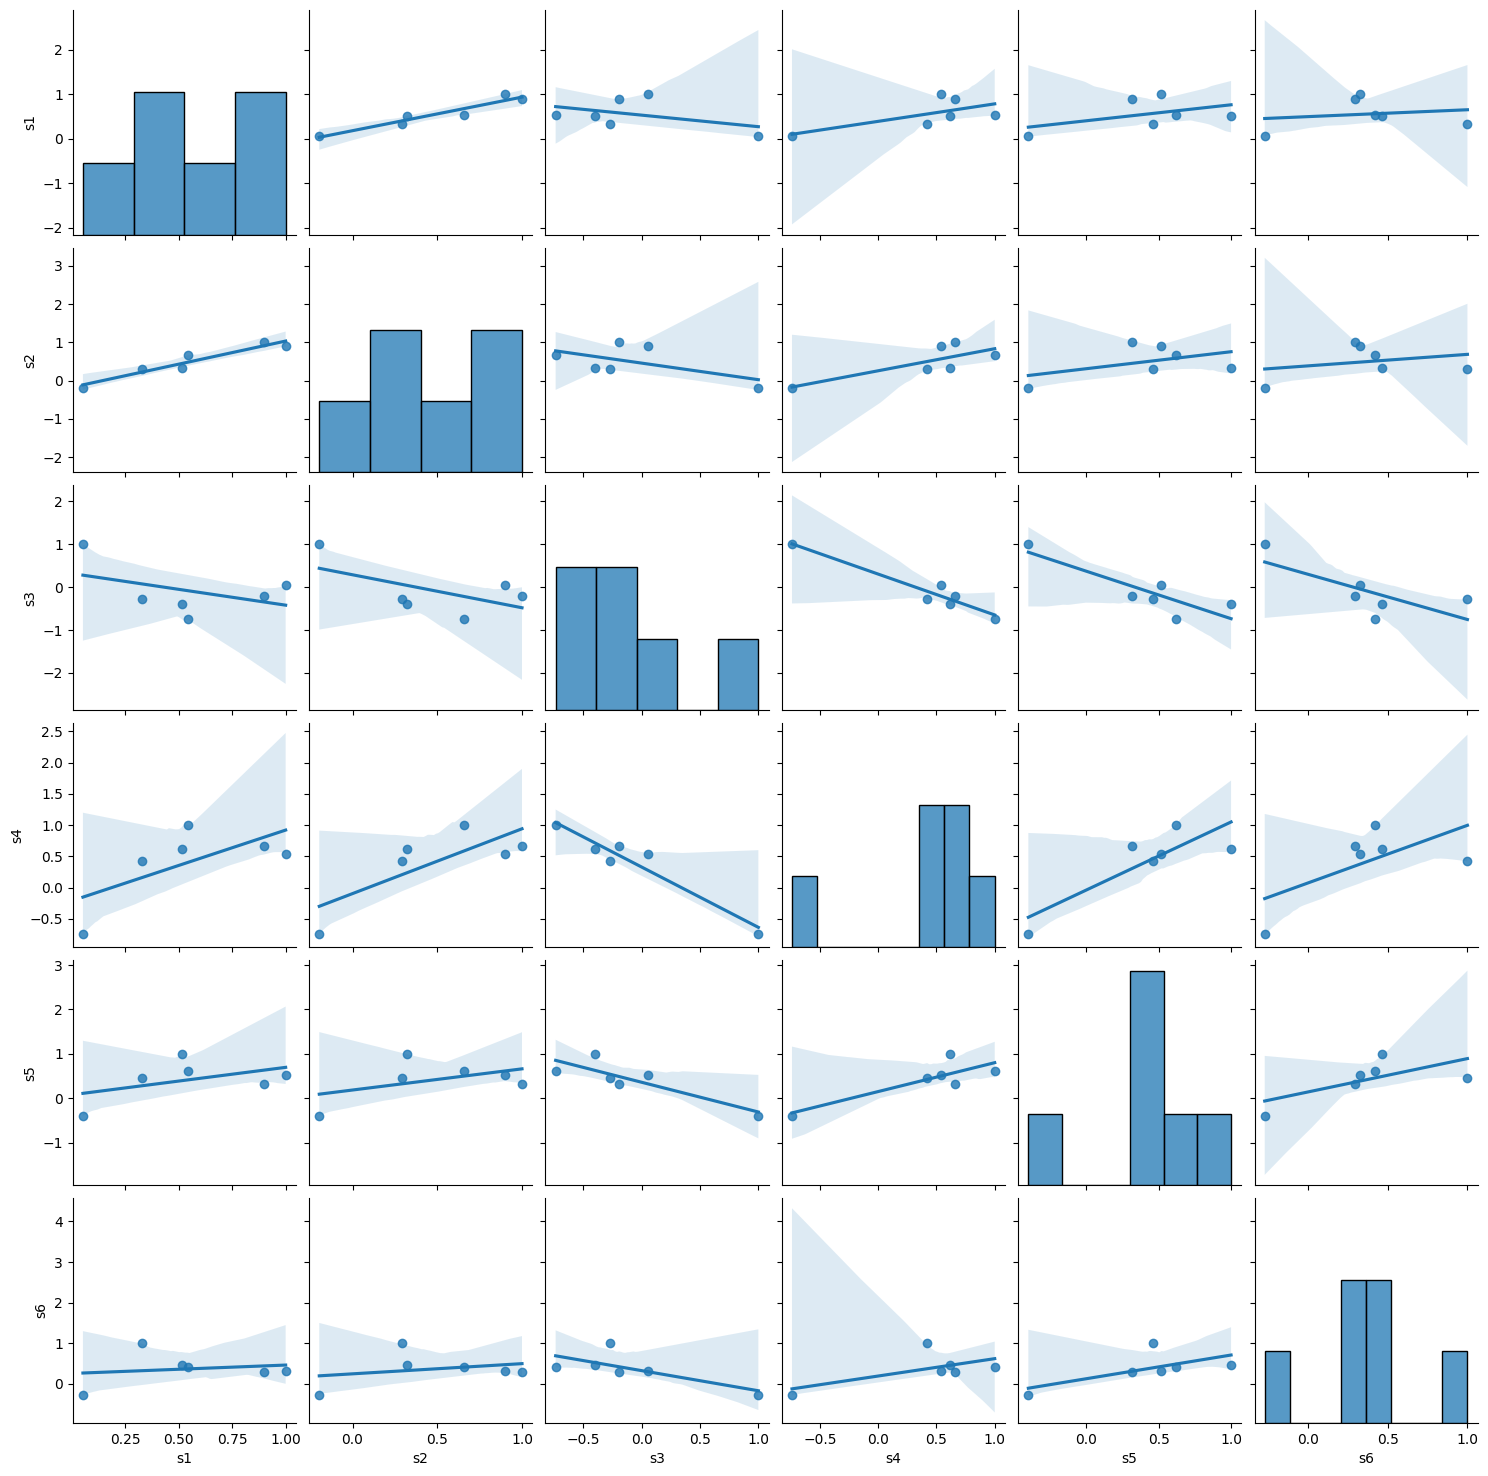

In [ ]:
newData = dfDia.drop(['age', 'sex', 'bmi', 'bp'],axis=1,inplace=False)
corNew = newData.corr()
plt.figure(1)
sns.pairplot(corNew,kind ='reg')

In [ ]:
#now create the linear model
# where BMI is the dependent variable and s5 as the independent variable
X = dfDia['s6'].values # independent variable
y = dfDia['bmi'].values # dependent variable

# if single independent variable is considered
X = X.reshape(-1,1)
# split the data into train and test
ratio= 0.3
[Xtrain,Xtest,ytrain,ytest] = model_selection.train_test_split(
    X,y,test_size=ratio,random_state=5
)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(309, 1) (309,)
(133, 1) (133,)


In [ ]:
# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.14836609910235232
Testing r2 value: 0.15142120424061067


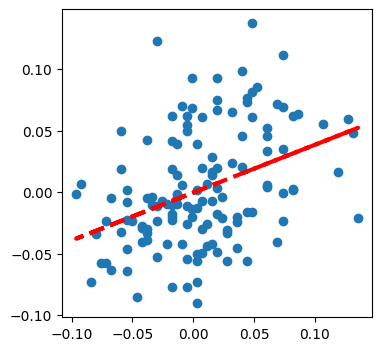

In [ ]:
plt.figure(1,(4,4))
plt.scatter(Xtest,ytest)
plt.plot(Xtest,ypredTst,'--r',linewidth=3)

(309, 1) (309,)
(133, 1) (133,)
Training r2 value: 0.7795103022549408
Testing r2 value: 0.8469928504733052


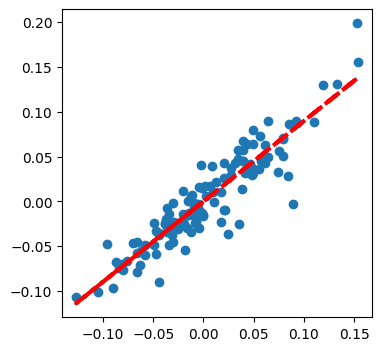

In [ ]:
X = dfDia['s1'].values # independent variable
y = dfDia['s2'].values # dependent variable

# if single independent variable is considered
X = X.reshape(-1,1)
# split the data into train and test
ratio= 0.3
[Xtrain,Xtest,ytrain,ytest] = model_selection.train_test_split(
    X,y,test_size=ratio,random_state=5
)

print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)


# create the linear model
lnModel = linear_model.LinearRegression()
# train the model using train data
lnModel = lnModel.fit(Xtrain,ytrain)
# predict the xtrain data
ypredTrn = lnModel.predict(Xtrain)
# predict the xtest data
ypredTst = lnModel.predict(Xtest)
# metrics
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

plt.figure(1,(4,4))
plt.scatter(Xtest,ytest)
plt.plot(Xtest,ypredTst,'--r',linewidth=3)

In [ ]:
newdata = datasets.fetch_california_housing()
print(newdata.feature_names)
print(newdata.DESCR)
print(newdata.target)
print(newdata.target_names)
print(newdata.data)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for Califo

In [ ]:
houses=newdata.data
feature_names=newdata.feature_names
dfHouse = pd.DataFrame(houses,columns=feature_names)
dfHouse.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
hcor = dfHouse.corr()
hcor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

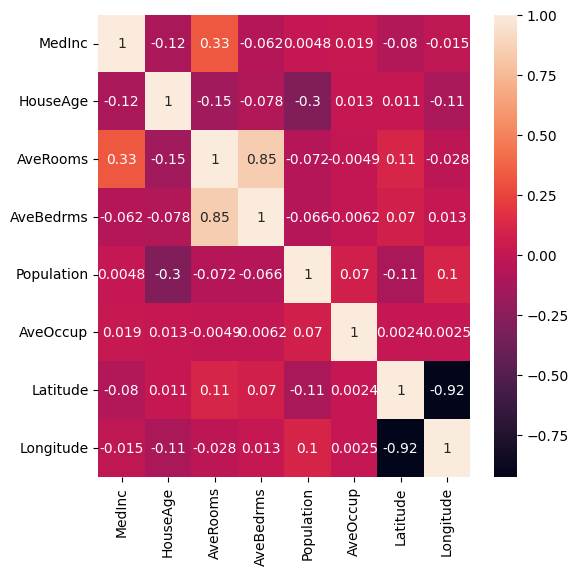

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1,(6,6))
sns.heatmap(hcor,annot=True)


In [ ]:
newHousing = pd.DataFrame(newdata.data,columns=newdata.feature_names)
newHousing['MedHouseVal'] = newdata.target
newHousing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

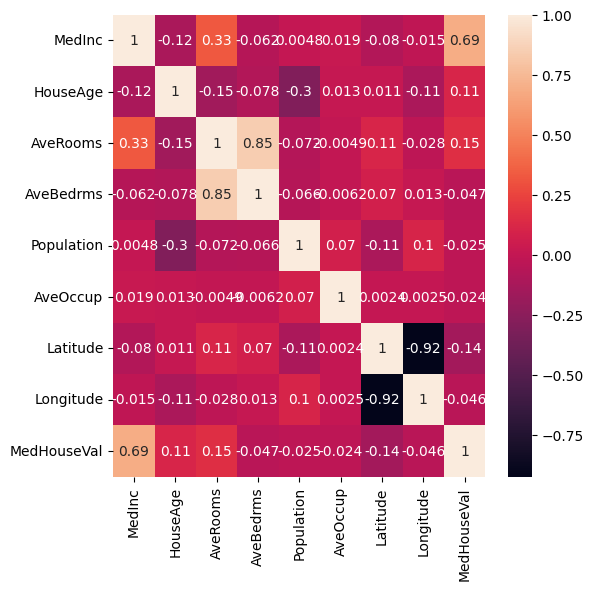

In [ ]:
Newcor = newHousing.corr()
plt.figure(2,(6,6))
sns.heatmap(Newcor,annot=True)